<a href="https://colab.research.google.com/github/akshatjain-1/parking_detection_yolov8/blob/main/parking_detection_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ultralytics opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.2/800.2 kB 12.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


In [ ]:
# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # You can choose a different variant like 'yolov8s.pt' for a larger model


100%|██████████| 6.25M/6.25M [00:00<00:00, 172MB/s]


In [ ]:
def detect_parking_spaces(image_path, model):
    # Load image
    img = cv2.imread(image_path)

    # Perform inference
    results = model.predict(img)

    # Get bounding boxes and classes
    boxes = results[0].boxes.xyxy  # Bounding boxes
    classes = results[0].boxes.cls  # Class labels
    scores = results[0].boxes.conf  # Confidence scores

    # Draw bounding boxes on the image
    for box, cls, score in zip(boxes, classes, scores):
        if score > 0.5:  # Confidence threshold
            x1, y1, x2, y2 = box
            label = model.names[int(cls)]
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



0: 160x640 5 cars, 4 buss, 1 traffic light, 1 cell phone, 221.9ms
Speed: 16.7ms preprocess, 221.9ms inference, 28.6ms postprocess per image at shape (1, 3, 160, 640)


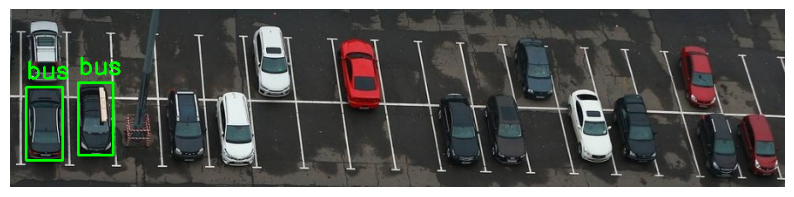


0: 352x640 1 cell phone, 150.0ms
Speed: 5.0ms preprocess, 150.0ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)


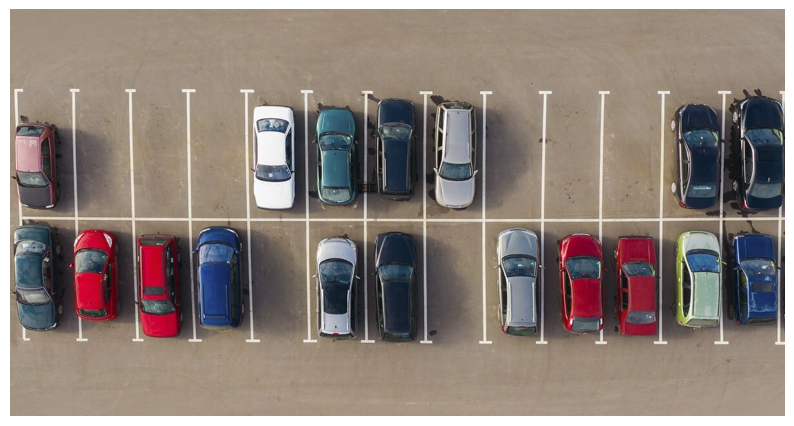


0: 384x640 30 cell phones, 194.5ms
Speed: 3.6ms preprocess, 194.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


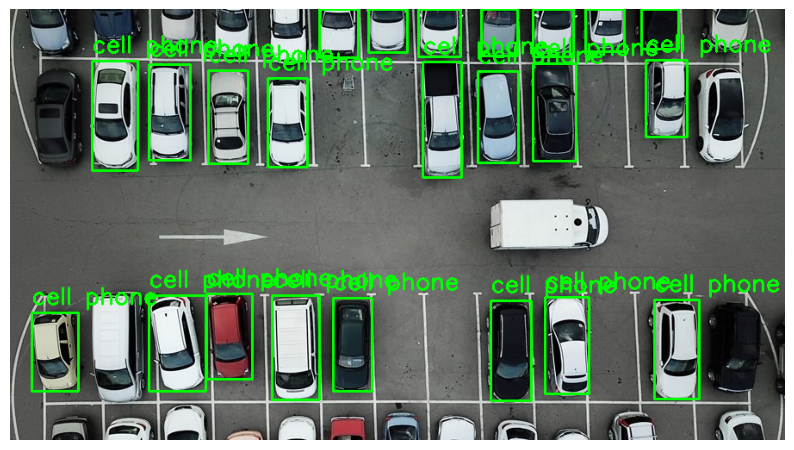


0: 480x640 5 cars, 29 cell phones, 222.7ms
Speed: 3.8ms preprocess, 222.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


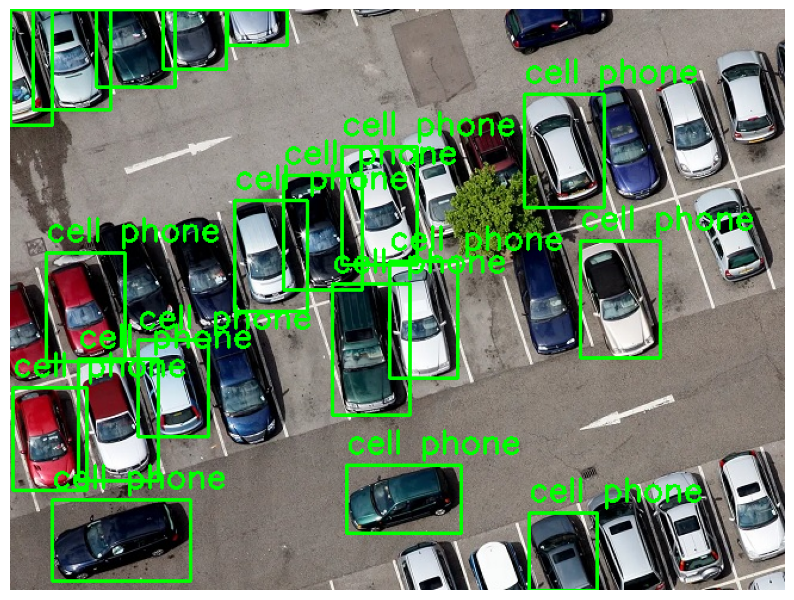


0: 352x640 2 buss, 13 cell phones, 210.4ms
Speed: 4.5ms preprocess, 210.4ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)


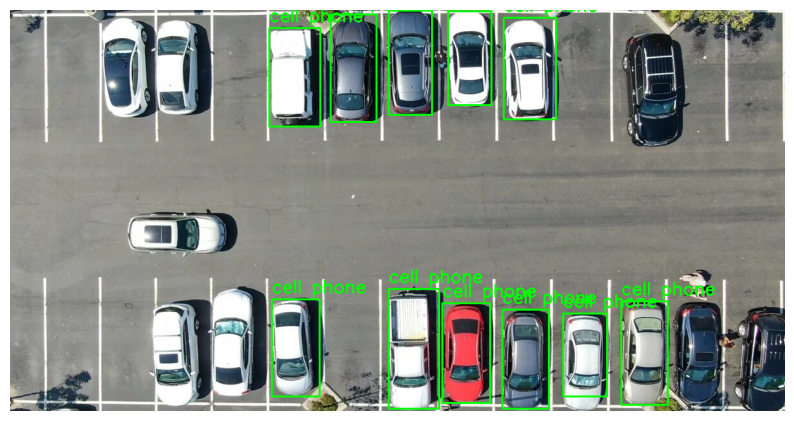


0: 448x640 6 cell phones, 223.3ms
Speed: 7.3ms preprocess, 223.3ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


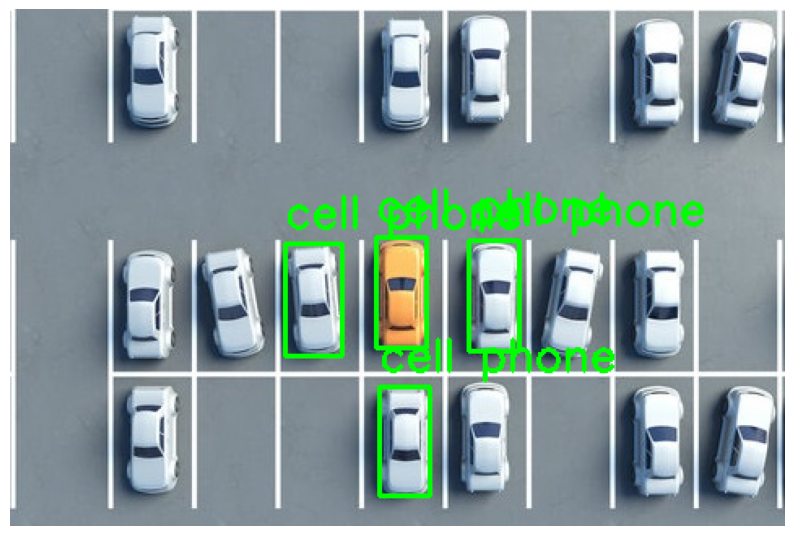

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 270.6ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 205.2ms
Speed: 4.0ms preprocess, 237.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


<Figure size 1000x1000 with 0 Axes>

In [ ]:
import os

# Directory containing parking lot images
image_dir = 'parking_lot_images'

# Iterate through each image in the directory
for image_file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_file)
    detect_parking_spaces(image_path, model)


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # You can choose a different variant like 'yolov8s.pt' for a larger model

def detect_parking_spaces(image_path, model):
    # Load image
    # Check if the image file exists before attempting to load it.
    if not os.path.exists(image_path):
        print(f"Error: Image file not found: {image_path}")
        return

    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Failed to load image: {image_path}")
        return

    # Perform inference
    results = model.predict(img)

    # Get bounding boxes and classes
    boxes = results[0].boxes.xyxy  # Bounding boxes
    classes = results[0].boxes.cls  # Class labels
    scores = results[0].boxes.conf  # Confidence scores

    # Draw bounding boxes on the image
    for box, cls, score in zip(boxes, classes, scores):
        if score > 0.5:  # Confidence threshold
            x1, y1, x2, y2 = box
            label = model.names[int(cls)]
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Directory containing parking lot images
image_dir = 'parking_lot_images'

# Iterate through each image in the directory
for image_file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_file)
    detect_parking_spaces(image_path, model)

In [ ]:
model = YOLO('yolov8n.pt')  # Load the pre-trained model

# Fine-tune the model on your dataset
model.train(data='path/to/dataset.yaml', epochs=50, imgsz=640)


Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=path/to/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

RuntimeError: Dataset 'path/to/dataset.yaml' error ❌ 'path/to/dataset.yaml' does not exist